## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer

07-20 18:39:08 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
datasets_root_path = './../../resource/datasets/binary/Magic'
train_data = pd.read_csv('{}/train.csv'.format(datasets_root_path))
test_data = pd.read_csv('{}/test.csv'.format(datasets_root_path))
X_train = train_data.copy()
y_train = X_train.pop('Class')
X_test = test_data.copy()
y_test = X_test.pop('Class')

# Check  features difference between train&test

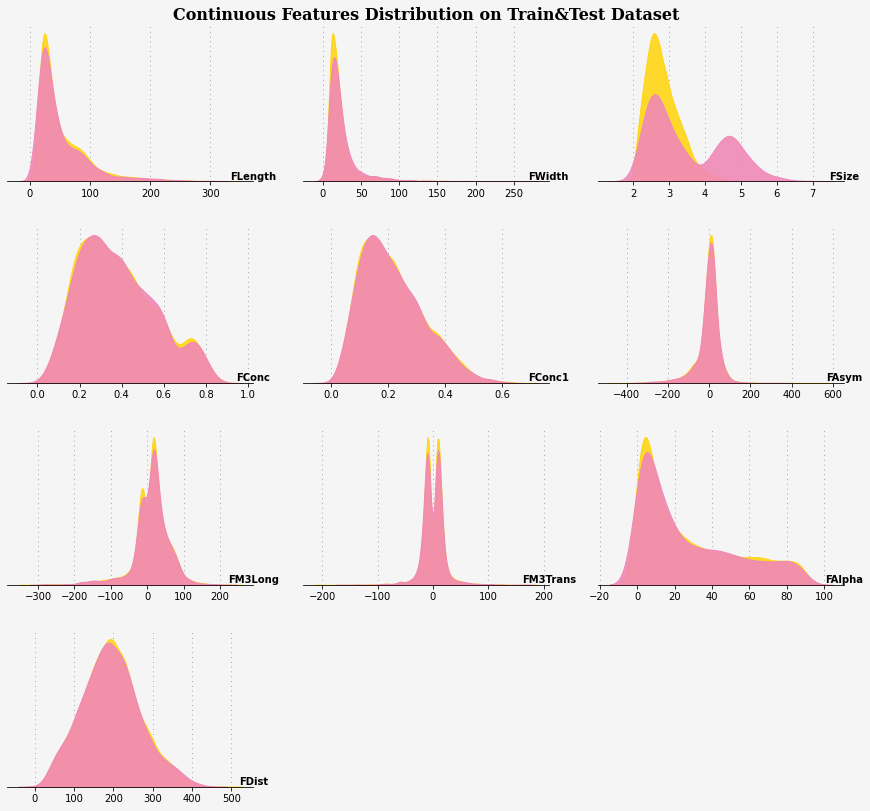

In [3]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
def show_continuous_features(X_train,X_test,num_feature):
    _col = 3
    _len = len(num_feature)
    fig = plt.figure(figsize=(15, math.ceil(_len / _col)*3.5), facecolor='#f6f5f5')
    gs = fig.add_gridspec(math.ceil(_len / _col), _col)
    gs.update(wspace=0.2, hspace=0.3)
    background_color = "#f6f5f5"
    run_no = 0
    for row in range(0, math.ceil(len(num_feature) / _col)):
        for col in range(0, _col):
            if row * _col + col >= len(num_feature):
                break
            locals()["ax" + str(run_no)] = fig.add_subplot(gs[row, col])
            locals()["ax" + str(run_no)].set_facecolor(background_color)
            locals()["ax" + str(run_no)].set_yticklabels([])
            locals()["ax" + str(run_no)].tick_params(axis='y', which=u'both', length=0)
            for s in ["top", "right", 'left']:
                locals()["ax" + str(run_no)].spines[s].set_visible(False)
            run_no += 1
    locals()['ax1'].set_title('Continuous Features Distribution on Train&Test Dataset', fontsize=16, fontweight='bold',
                              fontfamily='serif')
    run_no = 0
    for col in num_feature:
        sns.kdeplot(X_train[col],ax=locals()["ax" + str(run_no)], shade=True, color='#ffd514', alpha=0.9, zorder=2)
        sns.kdeplot(X_test[col], ax=locals()["ax" + str(run_no)], shade=True, color='#f088b7', alpha=0.9, zorder=2)
        locals()["ax" + str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':',
                                          dashes=(1, 5))
        locals()["ax" + str(run_no)].set_ylabel(col, fontsize=10, fontweight='bold').set_rotation(0)
        locals()["ax" + str(run_no)].yaxis.set_label_coords(1, 0)
        locals()["ax" + str(run_no)].set_xlabel('')
        run_no += 1
    plt.show()
show_continuous_features(X_train,X_test,X_train.columns)

# Without drift_detection
### _best_reward is 0.7726

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(15216, 10)","(15216,)",None,None,"(3804, 11)",binary(2)


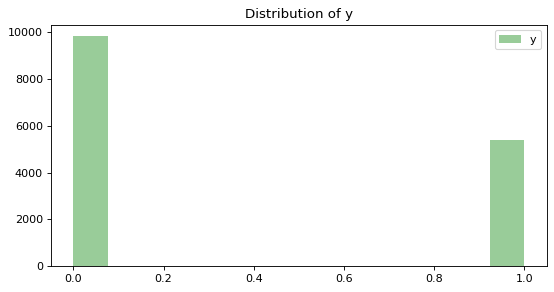

07-20 18:39:12 W hypernets.e.compete.py 1167 - X_train['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist'] and X_test['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist', 'Class'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
2,unselected_features,[]
3,X_train.shape,"(15216, 10)"
4,y_train.shape,"(15216,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(3804, 10)"
8,unselected_reason,{}
9,kept/dropped feature count,10/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.856,4,0.892086,53.144027,30,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,4,0.892086,1.771435,"[2, 0, 1, 1, 2, 2, 0]"
1,27,0.877193,1.271865,"[2, 2, 0, 1, 1, 3]"
2,17,0.868817,5.603897,"[2, 2, 0, 3, 3, 2]"
3,16,0.862661,1.775685,"[2, 2, 0, 3, 2, 1]"
4,5,0.859296,1.717751,"[2, 2, 0, 0, 2, 0]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 0, 1, 1, 2, 2, 0]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.01
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,10
6-numeric_or_scaler_0.hp_or,0


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.887935,6,0.890285,33.571326,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,6,0.890285,4.112213,"[0, 0, 1, 1, 65, 1, 1, 5, 2, 4]"
1,10,0.887935,2.451049,"[0, 0, 1, 1, 225, 0, 2, 1, 3, 0]"
2,5,0.887691,2.205667,"[0, 2, 0, 1, 510, 0, 1, 5, 0]"
3,3,0.878417,1.743849,"[1, 3, 0, 0, 0, 0, 1, 2, 5, 3]"
4,4,0.866667,1.360141,"[0, 2, 0, 2, 130, 2, 3, 5, 2]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 0, 1, 1, 65, 1, 1, 5, 2, 4]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,65
5-Module_LightGBMEstimator_1.max_depth,5
6-Module_LightGBMEstimator_1.learning_rate,0.01
7-Module_LightGBMEstimator_1.reg_alpha,100


### Fitted parameters

,key,value
0,input_features,"[FConc, FConc1, FAsym, FM3Long, FM3Trans, FAlp..."
1,best_reward,0.832945
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.25, 0.35, 0..."
1,scores,"[0.8329454357382984, 0.8984168865435356, 0.933..."
2,best_stack,"[0, 7, 7, 7, 7, 7, 8, 8, 8, 7, 9, 6, 6, 6, 6, ..."
3,hits,"{0: 1, 7: 7, 8: 5, 9: 1, 6: 5, 1: 1}"
4,ensemble_size,20


In [4]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(),target='Class', reward_metric='precision',
                             random_state=8888,cv=True,early_stopping_rounds=0,
                             max_trials=10,
                             drift_detection=False)
estimator = experiment.run()

In [5]:
scorer = get_scorer(metric_to_scoring('precision'))
score = scorer(estimator, X_test, y_test)
score

0.7726495726495727

# Use drift_detection
 ###   _best_reward is 0.9908

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(15216, 10)","(15216,)",None,None,"(3804, 11)",binary(2)


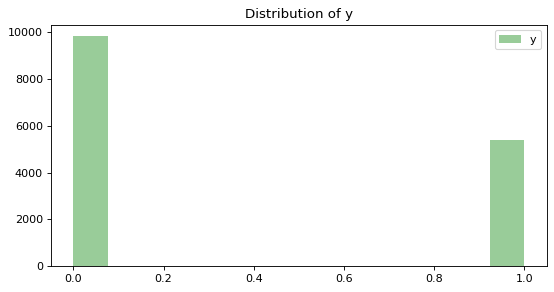

07-20 18:40:40 W hypernets.e.compete.py 1167 - X_train['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist'] and X_test['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist', 'Class'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
2,unselected_features,[]
3,X_train.shape,"(15216, 10)"
4,y_train.shape,"(15216,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(3804, 10)"
8,unselected_reason,{}
9,kept/dropped feature count,10/0


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,8
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.52


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FConc, FConc1, FAsym, FM3Long, FM3Trans, FAlp..."
2,unselected_features,"[FLength, FWidth, FSize]"
3,history,"[{'auc': 0.911637662032087, 'n_features': 7, '..."
4,scores,"{'FLength': 0.5351110121307476, 'FWidth': 0.53..."
5,kept/dropped feature count,7/3


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.800425,16,0.849351,76.905858,29,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,16,0.849351,1.698077,"[2, 1, 1, 0, 2, 0, 1]"
1,4,0.835000,0.835637,"[1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2]"
2,18,0.834184,1.265046,"[2, 3, 1, 1, 1, 4, 4]"
3,24,0.818763,1.320141,"[2, 3, 0, 3, 1, 2]"
4,5,0.814059,1.416676,"[0, 0, 0, 1, 455, 0, 3, 2, 1]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 1, 1, 0, 2, 0, 1]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.001
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,None
6-numeric_or_scaler_0.hp_or,1


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.83492,1,0.869694,35.283072,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,1,0.869694,6.213401,"[1, 2, 0, 1, 0, 0, 2, 0, 5, 4]"
1,9,0.849879,3.287987,"[2, 1, 0, 2, 0, 0]"
2,4,0.847506,1.420953,"[0, 0, 1, 0, 360, 1, 2, 5, 0, 0]"
3,10,0.834920,1.781917,"[1, 2, 1, 2, 2, 0, 4, 2, 0, 4, 2]"
4,8,0.833333,4.325267,"[0, 3, 0, 0, 500, 3, 2, 2, 4]"


#### Best Trial:

key,value
signature,efa0b027dff5f7cb032664969d49ae84
vectors,"[1, 2, 0, 1, 0, 0, 2, 0, 5, 4]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,False
3-Module_XGBoostEstimator_1.max_depth,5
4-Module_XGBoostEstimator_1.learning_rate,0.001
5-Module_XGBoostEstimator_1.booster,gbtree
6-Module_XGBoostEstimator_1.gamma,1.5
7-Module_XGBoostEstimator_1.min_child_weight,1


### Fitted parameters

,key,value
0,input_features,"[FConc, FConc1, FAsym, FM3Long, FM3Trans, FAlp..."
1,best_reward,0.832945
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.25, 0.35, 0..."
1,scores,"[0.8329454357382984, 0.8984168865435356, 0.933..."
2,best_stack,"[0, 7, 7, 7, 7, 7, 8, 8, 8, 7, 9, 6, 6, 6, 6, ..."
3,hits,"{0: 1, 7: 7, 8: 5, 9: 1, 6: 5, 1: 1}"
4,ensemble_size,20


0.9908256880733946

In [6]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='Class', reward_metric='precision',
                             random_state=8888,max_trials=10,cv=True,early_stopping_rounds=0,
                             drift_detection=True,
                             drift_detection_variable_shift_threshold=0.6,
                             )
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('precision'))
score = scorer(estimator, X_test, y_test)
score

#  Set more params for drift_detection
### _best_reward is 1.0

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(15216, 10)","(15216,)",None,None,"(3804, 11)",binary(2)


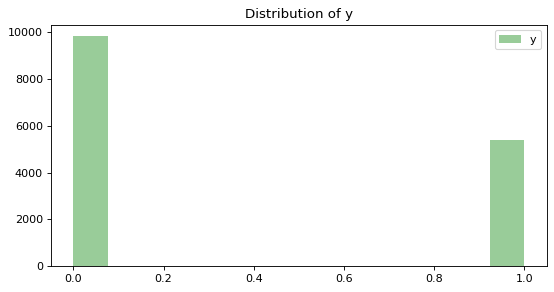

07-20 18:42:35 W hypernets.e.compete.py 1167 - X_train['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist'] and X_test['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist', 'Class'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
2,unselected_features,[]
3,X_train.shape,"(15216, 10)"
4,y_train.shape,"(15216,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(3804, 10)"
8,unselected_reason,{}
9,kept/dropped feature count,10/0


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,8
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.52


07-20 18:42:40 W hypernets.t.__init__.py 1325 - The number of remaining features is insufficient to continue remove features. AUC:0.911637662032087 Remaining features:['FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist']


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FConc, FConc1, FAsym, FM3Long, FM3Trans, FAlp..."
2,unselected_features,"[FLength, FWidth, FSize]"
3,history,"[{'auc': 0.911637662032087, 'n_features': 7, '..."
4,scores,"{'FLength': 0.5351110121307476, 'FWidth': 0.53..."
5,kept/dropped feature count,7/3


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.0,9,0.7981,83.860222,30,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,0.798100,1.216427,"[2, 0, 1, 1, 1, 3, 0]"
1,10,0.793177,1.709971,"[2, 2, 1, 3, 2, 0, 0]"
2,8,0.792541,4.762894,"[2, 0, 1, 0, 3, 0, 4]"
3,21,0.792453,4.864727,"[2, 2, 0, 1, 3, 4]"
4,24,0.792453,4.816004,"[2, 1, 1, 1, 3, 4, 0]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 0, 1, 1, 1, 3, 0]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.01
4-Module_CatBoostEstimator_1.depth,5
5-Module_CatBoostEstimator_1.l2_leaf_reg,20
6-numeric_or_scaler_0.hp_or,0


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.807497,9,0.832945,33.768745,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,0.832945,5.213350,"[1, 3, 1, 1, 1, 1, 2, 0, 3, 0, 3]"
1,7,0.815470,4.578172,"[2, 1, 1, 0, 1, 3, 4]"
2,10,0.807497,0.659301,"[1, 1, 1, 0, 2, 0, 3, 0, 4, 2, 1]"
3,3,0.802699,1.115101,"[1, 2, 1, 0, 3, 1, 2, 2, 5, 2, 2]"
4,8,0.801439,1.246637,"[1, 0, 0, 1, 2, 1, 1, 0, 3, 3]"


#### Best Trial:

key,value
signature,aabad6e27f1e0a7785a3649fc4846852
vectors,"[1, 3, 1, 1, 1, 1, 2, 0, 3, 0, 3]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_XGBoostEstimator_1.max_depth,5
4-Module_XGBoostEstimator_1.learning_rate,0.01
5-Module_XGBoostEstimator_1.booster,dart
6-Module_XGBoostEstimator_1.gamma,1.5
7-Module_XGBoostEstimator_1.min_child_weight,1


### Fitted parameters

,key,value
0,input_features,"[FConc, FConc1, FAsym, FM3Long, FM3Trans, FAlp..."
1,best_reward,0.832945
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.25, 0.35, 0..."
1,scores,"[0.8329454357382984, 0.8984168865435356, 0.933..."
2,best_stack,"[0, 7, 7, 7, 7, 7, 8, 8, 8, 7, 9, 6, 6, 6, 6, ..."
3,hits,"{0: 1, 7: 7, 8: 5, 9: 1, 6: 5, 1: 1}"
4,ensemble_size,20


1.0

In [7]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='Class', reward_metric='precision',
                             random_state=8888,max_trials=10,cv=True,early_stopping_rounds=0,
                             drift_detection=True,
                             drift_detection_variable_shift_threshold=0.52,
                             drift_detection_min_features=8,
                             )
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('precision'))
score = scorer(estimator, X_test, y_test)
score